624 images chargées.
Forme des données : (624, 40000)
NORMAL:267
PNEUMONIA:357


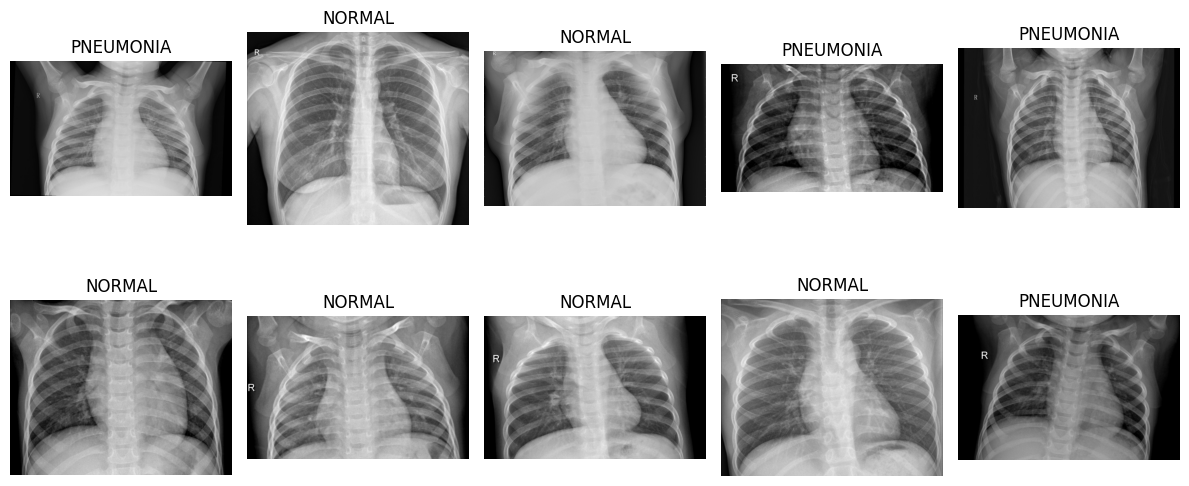

Précision du clustering (KMeans) : 62.50%


In [28]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dossier contenant les images
base_dir = 'chest_Xray/test'

# Sous-dossiers contenant les classes
categories = ['NORMAL', 'PNEUMONIA']

# Préparation des données
image_data = []
labels_true = []  # Pour comparer plus tard
image_paths = []
img_size = 200  # redimensionnement standard

for label_idx, category in enumerate(categories):
    folder = os.path.join(base_dir, category)
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (img_size, img_size))
            image_flattened = image.flatten()
            image_data.append(image_flattened)
            labels_true.append(label_idx)  # 0 = NORMAL, 1 = PNEUMONIA
            image_paths.append(img_path)

# Conversion en tableau numpy
image_data = np.array(image_data)
labels_true = np.array(labels_true)

print(f"{len(image_data)} images chargées.")
print(f"Forme des données : {image_data.shape}")

# Application de KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels_pred = kmeans.fit_predict(image_data)
print('NORMAL:' + str(np.count_nonzero(np.array(labels_pred) == 0)))
print('PNEUMONIA:' + str(np.count_nonzero(np.array(labels_pred) == 1)))
# Affichage des images groupées par clusters prédits
plt.figure(figsize=(12, 6))
for i in range(10):
    img = cv2.imread(image_paths[i])
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if (labels_pred[i]==1):
        plt.title(f'PNEUMONIA')     
    else:
        plt.title(f'NORMAL')     
    plt.axis('off')

plt.tight_layout()
plt.show()

from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Ré-aligner les labels prédits pour correspondre aux labels vrais
labels_corrected = np.zeros_like(labels_pred)
for cluster in np.unique(labels_pred):
    mask = labels_pred == cluster
    labels_corrected[mask] = mode(labels_true[mask])[0]

# Calcul de l'accuracy
accuracy = accuracy_score(labels_true, labels_corrected)
print(f"Précision du clustering (KMeans) : {accuracy * 100:.2f}%")

